# Proyek UTS PMDPM

<b>Harap jangan menghapus cell dan komentar yang diberikan!</b>

Setiap cell markdown dan code akan berisi instruksi pengerjaan Proyek UTS PMDPM

Dalam notebook ini Anda akan diminta untuk membuat sebuah proyek Pembelajaran Mesin menggunakan dataset yang sudah disediakan. Proyek akan terdiri dari proses inisialisasi, data loading, data cleansing, feature engineering, modelling dan evaluasi model. Pada bagian akhir silahkan berikan laporan singkat dari proyek yang sudah dikerjakan

## Studi Kasus

Dataset: Stroke Prediction Dataset (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) 

Deskripsi: Menurut WHO, stroke adalah penyebab kematian nomor 2 di dunia, sekitar 11% dari total kematian. Dataset ini digunakan untuk memprediksi apakah pasien memiliki kemungkinan terkena stroke berdasarkan input seperti gender, usia, penyakit bawaan, dan status merokok [3]. Setiap baris data menyediakan informasi relevan mengenai pasien. 

Informasi atribut: 

1) id: unique identifier 

2) gender: "Male", "Female" or "Other" 

3) age: age of the patient 

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension 

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 

6) ever_married: "No" or "Yes" 

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" 

8) Residence_type: "Rural" or "Urban" 

9) avg_glucose_level: average glucose level in blood 

10) bmi: body mass index 

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* 

12) stroke: 1 if the patient had a stroke or 0 if not 

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient 

## Penjelasan Tugas

Terapkan pemrosesan dataset dari loading, data cleansing (jika perlu), data scaling, feature selection, hingga evaluasi model secara sederhana menggunakan code yang sudah dipelajari dalam latihan-latihan dan tugas.

### Inisialisasi

Bagian berikut berisi import library yang dibutuhkan

In [1]:
# Import library yang dibutuhkan
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### Data Loading

Bagian berikut berisi proses data loading (boleh dengan file upload atau dengan mount drive), jangan lupa tampilkan 20 baris data teratas!

In [2]:
# Loading data yang akan diolah
FILENAME = "healthcare-dataset-stroke-data.csv"
df = pd.read_csv(FILENAME)

### Data Cleansing

Bagian berikut berisi proses pembersihan data (jika diperlukan, minimal cek apakah ada data yang kosong atau duplikat)

In [3]:
# Bersihkan dataset menggunakan metode yang sudah dipelajari
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [4]:
# Mengisi nilai kosong pada kolom bmi dengan nilai rata-rata bmi
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [5]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)

In [6]:
# Cek kembali apakah masih ada data yang kosong
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [7]:
# Menampilkan 20 baris data teratas
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [8]:
# Print data types
print(df.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [9]:
# Deskripsi data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Data Visualization

Dalam proses visualisasi data, silahkan visualisasikan feature menggunakan plot yang sesuai agar mendapat insight dari data dengan menjawab pertanyaan-pertanyaan berikut:

    untuk sub A:
    1. Bagaimana komposisi jumlah pasien laki-laki dan perempuan?
    2. Bagaimana sebaran usia antara kelompok pasien yang menderita hipertensi dan yang sehat?
    3. Bagaimana perbandingan sebaran nilai rerata glukosa dalam darah antara pasien yang stroke dengan yang sehat?

    untuk sub B:
    1. Bagaimana komposisi jumlah pasien yang tinggal di urban dan rural?
    2. Bagaimana sebaran nilai BMI antara kelompok pasien yang menderita penyakit jantung dan yang sehat?
    3. Bagaimana perbandingan jumlah pasien yang menderita stroke dengan yang sehat berdasarkan status merokok?

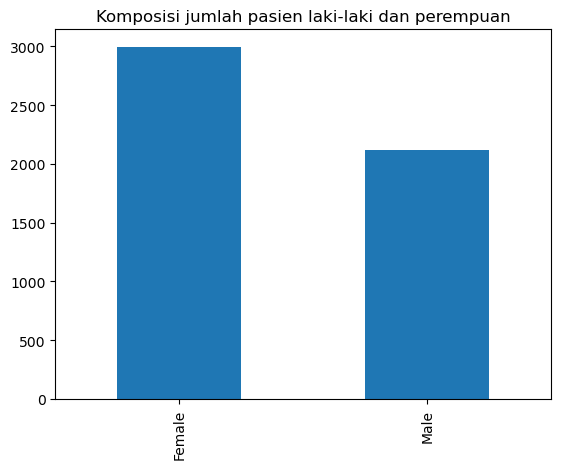

In [10]:
## Visualisasi fitur menggunakan metode yang sudah dipelajari
# Plotting komposisi jumlah pasien laki-laki (male) dan perempuan (female) kecuali data yang tidak diketahui gendernya
df[df["gender"].isin(["Male", "Female"])]["gender"].value_counts().plot(kind="bar",
                                                                        title="Komposisi jumlah pasien laki-laki dan perempuan")
plt.show()

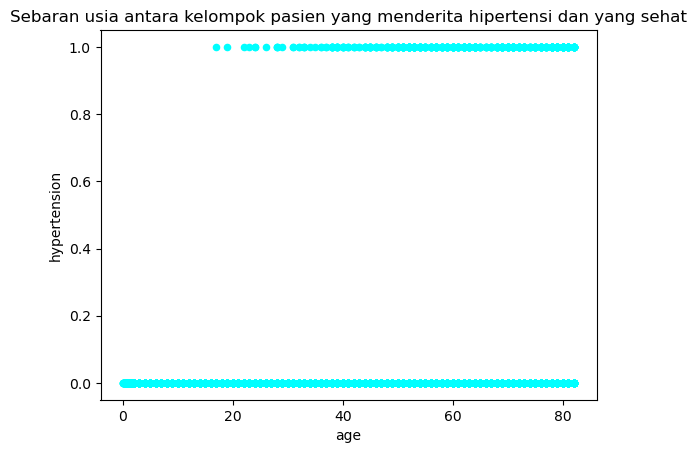

In [11]:
# Plotting sebaran usia antara kelompok pasien yang menderita hipertensi (hypertension) dan yang sehat
df.filter(items=["age", "hypertension"], axis=1).plot(kind="scatter", x="age", y="hypertension", c="cyan",
                                                      title="Sebaran usia antara kelompok pasien yang menderita hipertensi dan yang sehat")
plt.show()

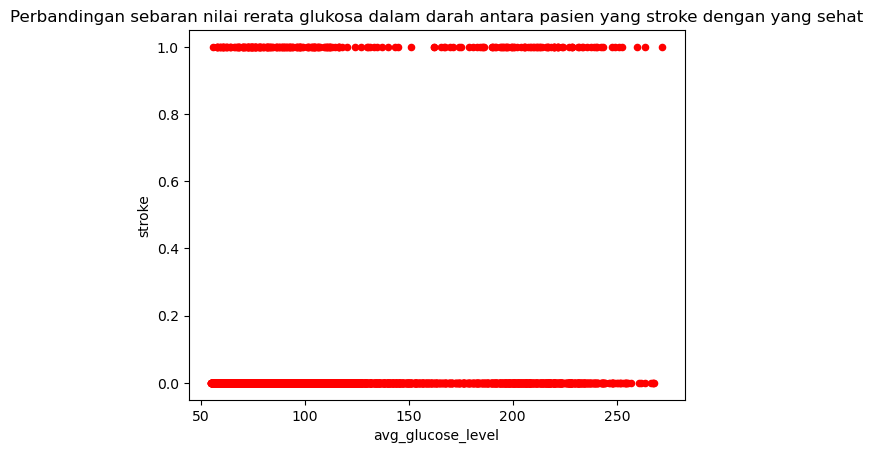

In [12]:
# Plotting perbandingan sebaran nilai rerata glukosa dalam darah antara pasien yang stroke dengan yang sehat
df.filter(items=["avg_glucose_level", "stroke"], axis=1).plot(kind="scatter", x="avg_glucose_level", y="stroke",
                                                              c="red",
                                                              title="Perbandingan sebaran nilai rerata glukosa dalam darah antara pasien yang stroke dengan yang sehat")
plt.show()


### Deskripsi Data Visualization
Berikan keterangan atau deskripsi singkat mengenai informasi yang diperoleh dari visualisasi data tersebut. Jawablah pertanyaan di atas pada cell markdown ini!
1. Komposisi jumlah pasien laki-laki dan perempuan
    - Jumlah pasien laki-laki lebih sedikit dibandingkan dengan jumlah pasien perempuan
2. Sebaran usia antara kelompok pasien yang menderita hipertensi dan yang sehat
    - Sebaran usia antara kelompok pasien yang menderita hipertensi dan yang sehat tidak terlalu jauh
    - Usia 18 kebawah tidak terlalu banyak yang menderita hipertensi
3. Perbandingan sebaran nilai rerata glukosa dalam darah antara pasien yang stroke dengan yang sehat
    - Sebaran nilai rerata glukosa dalam darah antara pasien yang stroke dengan yang sehat tidak terlalu jauh
    - Nilai rerata glukosa dalam darah 150 kebawah tidak terlalu banyak yang menderita stroke
    - Nilai rerata glukosa dalam darah 150 keatas terdapat lebih banyak pasien yang menderita stroke dibandingkan dengan pasien yang sehat

### Data Preparation and Scaling

Lakukan train-test split dan data scaling dengan ketentuan:  

    Untuk sub A: random_state train_test_split gunakan 2 digit terakhir NPM terbesar di sub kelompok, gunakan StandardScaler  

    Untuk sub B: random_state train_test_split gunakan 2 digit terakhir NPM terkecil di sub kelompok,gunakan MinMaxScaler

In [13]:
# Label Encoder
df.drop("id", axis=1, inplace=True)

df = df.apply(LabelEncoder().fit_transform)
print(df.dtypes)

gender               int64
age                  int64
hypertension         int64
heart_disease        int64
ever_married         int64
work_type            int64
Residence_type       int64
avg_glucose_level    int64
bmi                  int64
smoking_status       int64
stroke               int64
dtype: object


In [14]:
# Train test split
X = df.drop(columns=["stroke"])
y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=85)

In [15]:
# Standard Scaler
std_scaler = StandardScaler()
X_train_stdscaled = std_scaler.fit_transform(X_train)
X_test_stdscaled = std_scaler.transform(X_test)

print("Mean before scaling (test):\n {}".format(X_test.mean(axis=0)))
print("Mean after scaling (test):\n {}".format(X_test_stdscaled.mean(axis=0)))
print("Standard deviation before scaling (train):\n {}".format(X_train.std(axis=0)))
print("Standard deviation after scaling (train):\n {}".format(X_train_stdscaled.std(axis=0)))

Mean before scaling (test):
 gender                  0.412264
age                    64.461840
hypertension            0.105675
heart_disease           0.054142
ever_married            0.665362
work_type               2.160470
Residence_type          0.523810
avg_glucose_level    1916.592955
bmi                   163.149380
smoking_status          1.375734
dtype: float64
Mean after scaling (test):
 [-0.00586268  0.02811049  0.04024761  0.00082493  0.02758864 -0.00945558
  0.04510312  0.04337415  0.03081831 -0.0015479 ]
Standard deviation before scaling (train):
 gender                  0.492817
age                    23.155613
hypertension            0.291777
heart_disease           0.225962
ever_married            0.476332
work_type               1.094096
Residence_type          0.500068
avg_glucose_level    1099.327064
bmi                    73.790690
smoking_status          1.083806
dtype: float64
Standard deviation after scaling (train):
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Feature Selection

Melakukan feature selection menggunakan metode statistik univariat dan SelectFromModel untuk dibandingkan. Untuk jumlah feature, silahkan bereksperimen untuk mendapatkan jumlah performa model terbaik.

    Untuk sub A: gunakan SelectKBest dan RFE dengan ketentuan:
    jumlah feature minimal 5 dan model menggunakan RandomForestClassifier(n_estimators=100, random_state=dua digit terakhir NPM terkecil dalam sub kelompok).
    Terapkan SelectKBest dan RFE pada dataset yang belum diubah dan sudah diubah dengan StandardScaler. 

    Untuk sub B: gunakan SelectPercentile dan SelectFromModel dengan ketentuan:
    persentil minimal 30% dan model menggunakan RandomForestClassifier(n_estimators=200, random_state=dua digit terakhir NPM terbesar dalam sub kelompok).
    Terapkan SelectPercentile dan SelectFromModel pada dataset yang belum diubah dan sudah diubah dengan MinMaxScaler.

X_train.shape: (3577, 10)
X_train_skb_noscaled.shape: (3577, 7)
Selected features: Index(['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'avg_glucose_level', 'bmi'],
      dtype='object')


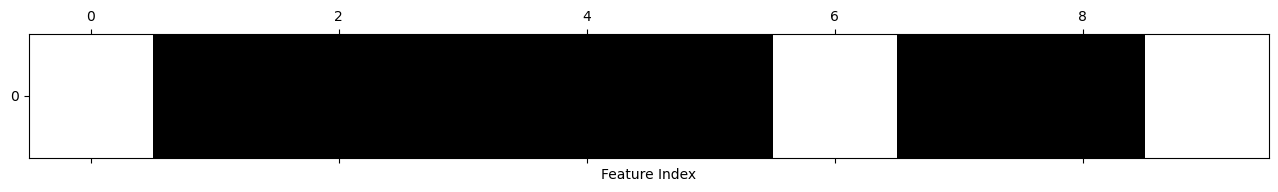

In [16]:
## Lakukan rekayasa fitur sesuai yang dibutuhkan
# SelectKBest (No-Scaling)
skb = SelectKBest(k=7)
skb.fit(X_train, y_train)

X_train_skb_noscaled = skb.transform(X_train)
X_test_skb_noscaled = skb.transform(X_test)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_skb_noscaled.shape: {}".format(X_train_skb_noscaled.shape))

mask = skb.get_support()
print("Selected features: {}".format(X.columns[mask]))

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Index")
plt.yticks([0])
plt.show()

X_train.shape: (3577, 10)
X_train_skb_stdscaled.shape: (3577, 7)
Selected features: Index(['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'avg_glucose_level', 'bmi'],
      dtype='object')


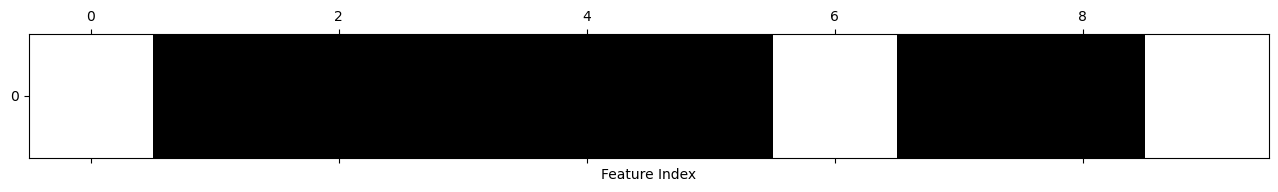

In [17]:
# SelectKBest (Standard Scaler)
skb = SelectKBest(k=7)
skb.fit(X_train_stdscaled, y_train)

X_train_skb_stdscaled = skb.transform(X_train_stdscaled)
X_test_skb_stdscaled = skb.transform(X_test_stdscaled)

print("X_train.shape: {}".format(X_train_stdscaled.shape))
print("X_train_skb_stdscaled.shape: {}".format(X_train_skb_stdscaled.shape))

mask = skb.get_support()
print("Selected features: {}".format(X.columns[mask]))

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Index")
plt.yticks([0])
plt.show()

X_train.shape: (3577, 10)
X_train_rfe_noscaled.shape: (3577, 7)
Selected features: Index(['age', 'heart_disease', 'work_type', 'Residence_type',
       'avg_glucose_level', 'bmi', 'smoking_status'],
      dtype='object')


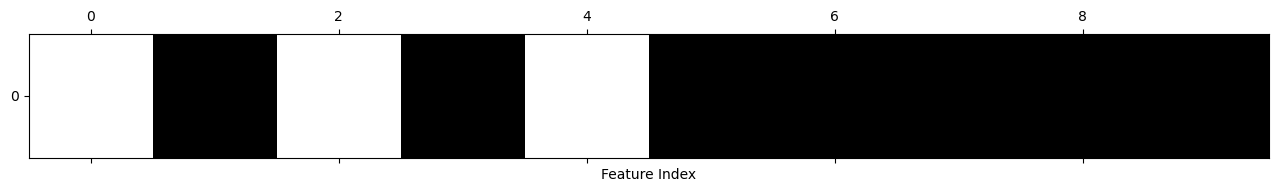

In [18]:
# RFE (No-Scaling)
rfe = RFE(RandomForestClassifier(n_estimators=100, random_state=53), n_features_to_select=7)
rfe.fit(X_train, y_train)

X_train_rfe_noscaled = rfe.transform(X_train)
X_test_rfe_noscaled = rfe.transform(X_test)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_rfe_noscaled.shape: {}".format(X_train_rfe_noscaled.shape))

mask = rfe.get_support()
print("Selected features: {}".format(X.columns[mask]))

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Index")
plt.yticks([0])
plt.show()

X_train.shape: (3577, 10)
X_train_rfe_stdscaled.shape: (3577, 7)
Selected features: Index(['age', 'heart_disease', 'work_type', 'Residence_type',
       'avg_glucose_level', 'bmi', 'smoking_status'],
      dtype='object')


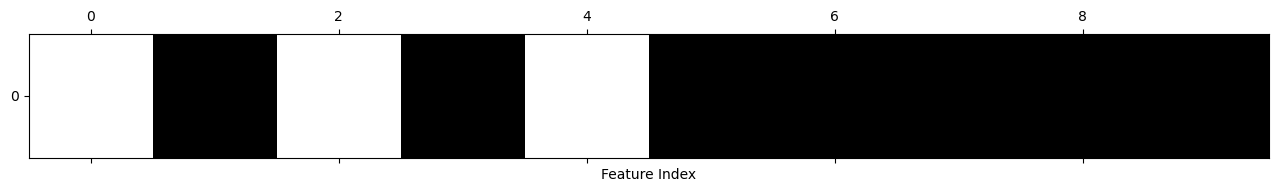

In [19]:
# RFE (Standard Scaler)
rfe = RFE(RandomForestClassifier(n_estimators=100, random_state=53), n_features_to_select=7)
rfe.fit(X_train_stdscaled, y_train)

X_train_rfe_stdscaled = rfe.transform(X_train_stdscaled)
X_test_rfe_stdscaled = rfe.transform(X_test_stdscaled)

print("X_train.shape: {}".format(X_train_stdscaled.shape))
print("X_train_rfe_stdscaled.shape: {}".format(X_train_rfe_stdscaled.shape))

mask = rfe.get_support()
print("Selected features: {}".format(X.columns[mask]))

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Index")
plt.yticks([0])
plt.show()

### Modelling

Menggunakan 2 algoritme pembelajaran mesin untuk klasifikasi. Eksplorasi pengaturan parameter yang ada pada algoritme yang akan Anda gunakan, tidak terbatas pada 1-2 parameter saja supaya optimal (selain random_state). Silahkan bereksperimen untuk parameter seperti n_estimators, max_depth, dll. agar mendapat akurasi terbaik.

Ketentuan:

    Sub A:
    1. DecisionTreeClassifier(random_state= dua digit terakhir NPM terbesar dalam sub kelompok, max_depth=bebas,criterion='entropy')
    2. LogisticRegression(C=bebas, max_iter=10000, class_weight='balanced')`

    Sub B:
    1. K-Nearest Neighbors(n_neighbors=bebas, weights='distance')
    2. LinearSVC(C=bebas, class_weight='balanced')

Total ada 6 model yang harus diuji dengan rincian:

<table>
<thead>
  <tr>
    <th>Sub kelompok</th>
    <th>Scaler</th>
    <th>Feature Selection</th>
    <th>Model</th>
    <th>Kombinasi Pengujian Training Set dan Test Set</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>SelectKBest</td>
    <td>Decision Tree</td>
    <td>StandardScaler+DecisionTree | StandardScaler+SelectKBest+DecisionTree</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>SelectKBest</td>
    <td>LogisticRegression</td>
    <td>StandardScaler+LogisticRegression | StandardScaler+SelectKBest+LogisticRegression</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>RFE</td>
    <td>Decision Tree</td>
    <td>StandardScaler+RFE+DecisionTree</td>
  </tr>
  <tr>
    <td>A</td>
    <td>StandardScaler</td>
    <td>RFE</td>
    <td>LogisticRegression</td>
    <td>StandardScaler+RFE+LogisticRegression</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectPercentile</td>
    <td>KNN</td>
    <td>MinMaxScaler+KNN | MinMaxScaler+SelectPercentile+KNN</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectPercentile</td>
    <td>LinearSVC</td>
    <td>MinMaxScaler+LinearSVC | MinMaxScaler+SelectPercentile+LinearSVC</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectFromModel</td>
    <td>KNN</td>
    <td>MinMaxScaler+SelectPercentile+KNN</td>
  </tr>
  <tr>
    <td>B</td>
    <td>MinMaxScaler</td>
    <td>SelectFromModel</td>
    <td>LinearSVC</td>
    <td>MinMaxScaler+SelectFromModel+LinearSVC</td>
  </tr>
</tbody>
</table>

In [20]:
# No Scaler + SelectKBest + DecisionTree
nsd = DecisionTreeClassifier(random_state=85, max_depth=11, criterion='entropy')
nsd.fit(X_train_skb_noscaled, y_train)

# StandardScaler + SelectKBest + DecisionTree
ssd = DecisionTreeClassifier(random_state=85, max_depth=11, criterion='entropy')
ssd.fit(X_train_skb_stdscaled, y_train)

# No Scaler + SelectKBest + DecisionTree
nsl = LogisticRegression(C=0.8, max_iter=10000, class_weight='balanced')
nsl.fit(X_train_skb_noscaled, y_train)

# StandardScaler + SelectKBest + DecisionTree
ssl = LogisticRegression(C=0.8, max_iter=10000, class_weight='balanced')
ssl.fit(X_train_skb_stdscaled, y_train)

# No Scaler + RFE + DecisionTree
nrd = DecisionTreeClassifier(random_state=85, max_depth=11, criterion='entropy')
nrd.fit(X_train_rfe_noscaled, y_train)

# StandardScaler + RFE + DecisionTree
srd = DecisionTreeClassifier(random_state=85, max_depth=11, criterion='entropy')
srd.fit(X_train_rfe_stdscaled, y_train)

# No Scaler + RFE + LogisticRegression
nrl = LogisticRegression(C=0.8, max_iter=10000, class_weight='balanced')
nrl.fit(X_train_rfe_noscaled, y_train)

# StandardScaler + RFE + LogisticRegression
srl = LogisticRegression(C=0.8, max_iter=10000, class_weight='balanced')
srl.fit(X_train_rfe_stdscaled, y_train)

LogisticRegression(C=0.8, class_weight='balanced', max_iter=10000)

### Evaluasi Model

Bagian berikut berisi evaluasi model secara sederhana menggunakan metrik akurasi (fungsi score). Uji akurasi hasil pembelajaran pada train set dan test set.

In [21]:
# Lakukan proses evaluasi model algoritme pembelajaran mesin
print("[ No Scaler + SelectKBest + DecisionTree ]")
print("No Scaler + SelectKBest + DecisionTree Train Set Score: {}".format(
    nsd.score(X_train_skb_noscaled, y_train)))
print("No Scaler + SelectKBest + DecisionTree Test Set Score: {}".format(
    nsd.score(X_test_skb_noscaled, y_test)))

print("\n")
print("[ StandardScaler + SelectKBest + DecisionTree ]")
print("StandardScaler + SelectKBest + DecisionTree Train Set Score: {}".format(
    ssd.score(X_train_skb_stdscaled, y_train)))
print("StandardScaler + SelectKBest + DecisionTree Test Set Score: {}".format(
    ssd.score(X_test_skb_stdscaled, y_test)))

print("\n")
print("[ No Scaler + SelectKBest + LogisticRegression ]")
print("No Scaler + SelectKBest + LogisticRegression Train Set Score: {}".format(
    nsl.score(X_train_skb_noscaled, y_train)))
print("No Scaler + SelectKBest + LogisticRegression Test Set Score: {}".format(
    nsl.score(X_test_skb_noscaled, y_test)))

print("\n")
print("[ StandardScaler + SelectKBest + LogisticRegression ]")
print("StandardScaler + SelectKBest + LogisticRegression Train Set Score: {}".format(
    ssl.score(X_train_skb_stdscaled, y_train)))
print("StandardScaler + SelectKBest + LogisticRegression Test Set Score: {}".format(
    ssl.score(X_test_skb_stdscaled, y_test)))

print("\n")
print("[ No Scaler + RFE + DecisionTree ]")
print("No Scaler + RFE + DecisionTree Train Set Score: {}".format(nrd.score(X_train_rfe_noscaled, y_train)))
print("No Scaler + RFE + DecisionTree Test Set Score: {}".format(nrd.score(X_test_rfe_noscaled, y_test)))

print("\n")
print("[ StandardScaler + RFE + DecisionTree ]")
print("StandardScaler + RFE + DecisionTree Train Set Score: {}".format(srd.score(X_train_rfe_stdscaled, y_train)))
print("StandardScaler + RFE + DecisionTree Test Set Score: {}".format(srd.score(X_test_rfe_stdscaled, y_test)))

print("\n")
print("[ No Scaler + RFE + LogisticRegression ]")
print("No Scaler + RFE + LogisticRegression Train Set Score: {}".format(
    nrl.score(X_train_rfe_noscaled, y_train)))
print("No Scaler + RFE + LogisticRegression Test Set Score: {}".format(
    nrl.score(X_test_rfe_noscaled, y_test)))

print("\n")
print("[ StandardScaler + RFE + LogisticRegression ]")
print("StandardScaler + RFE + LogisticRegression Train Set Score: {}".format(
    srl.score(X_train_rfe_stdscaled, y_train)))
print(
    "StandardScaler + RFE + LogisticRegression Test Set Score: {}".format(srl.score(X_test_rfe_stdscaled, y_test)))

[ No Scaler + SelectKBest + DecisionTree ]
No Scaler + SelectKBest + DecisionTree Train Set Score: 0.977075761811574
No Scaler + SelectKBest + DecisionTree Test Set Score: 0.9295499021526419


[ StandardScaler + SelectKBest + DecisionTree ]
StandardScaler + SelectKBest + DecisionTree Train Set Score: 0.977075761811574
StandardScaler + SelectKBest + DecisionTree Test Set Score: 0.9295499021526419


[ No Scaler + SelectKBest + LogisticRegression ]
No Scaler + SelectKBest + LogisticRegression Train Set Score: 0.7461559966452335
No Scaler + SelectKBest + LogisticRegression Test Set Score: 0.7338551859099804


[ StandardScaler + SelectKBest + LogisticRegression ]
StandardScaler + SelectKBest + LogisticRegression Train Set Score: 0.7408442829186469
StandardScaler + SelectKBest + LogisticRegression Test Set Score: 0.7325505544683627


[ No Scaler + RFE + DecisionTree ]
No Scaler + RFE + DecisionTree Train Set Score: 0.977075761811574
No Scaler + RFE + DecisionTree Test Set Score: 0.9262883235

## Kesimpulan

Silahkan jawab pertanyaan berikut:

1. Apakah ada pengaruh penskalaan data pada dataset terhadap performa model-model machine learning? 

2. Apa saja feature-feature yang penting untuk membedakan antara pasien yang rawan terkena stroke dengan yang sehat? 

3. Model apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?

*tulis jawaban Anda di cell ini*
1. Ada pengaruh penskalaan data pada dataset terhadap performa model-model machine learning. Hal ini terlihat dari hasil evaluasi model yang dilakukan.
2. Feature-feature yang penting untuk membedakan antara pasien yang rawan terkena stroke dengan yang sehat adalah 'age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'.
3. Model yang memiliki performa paling baik terhadap dataset adalah StandardScaler + SelectKBest + DecisionTree. Parameter setting yang paling optimal dari model tersebut adalah max_depth=11, criterion='entropy'.